<a href="https://colab.research.google.com/github/Tanvir284/CSE-122-Fall-2022-49-10-/blob/main/Banknote_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Error: 'banknote_authentication.csv' not found. Creating a dummy DataFrame for demonstration.

Dataset Head:
   variance  skewness  curtosis   entropy  class
0  0.793347  7.630937  0.636748  3.388597      0
1 -0.854332 -4.313920 -6.221208  3.219600      0
2  8.520198  2.043510  0.787648 -2.984286      1
3  7.945668  2.032088  1.608603 -2.182619      1
4 -1.057016  7.237293  2.264771  1.500786      1

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  100 non-null    float64
 1   skewness  100 non-null    float64
 2   curtosis  100 non-null    float64
 3   entropy   100 non-null    float64
 4   class     100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 KB

Statistical Measures (df.describe()):
         variance    skewness    curtosis     entropy       class
count  100.000000  100.000000  100.000000  100.0000

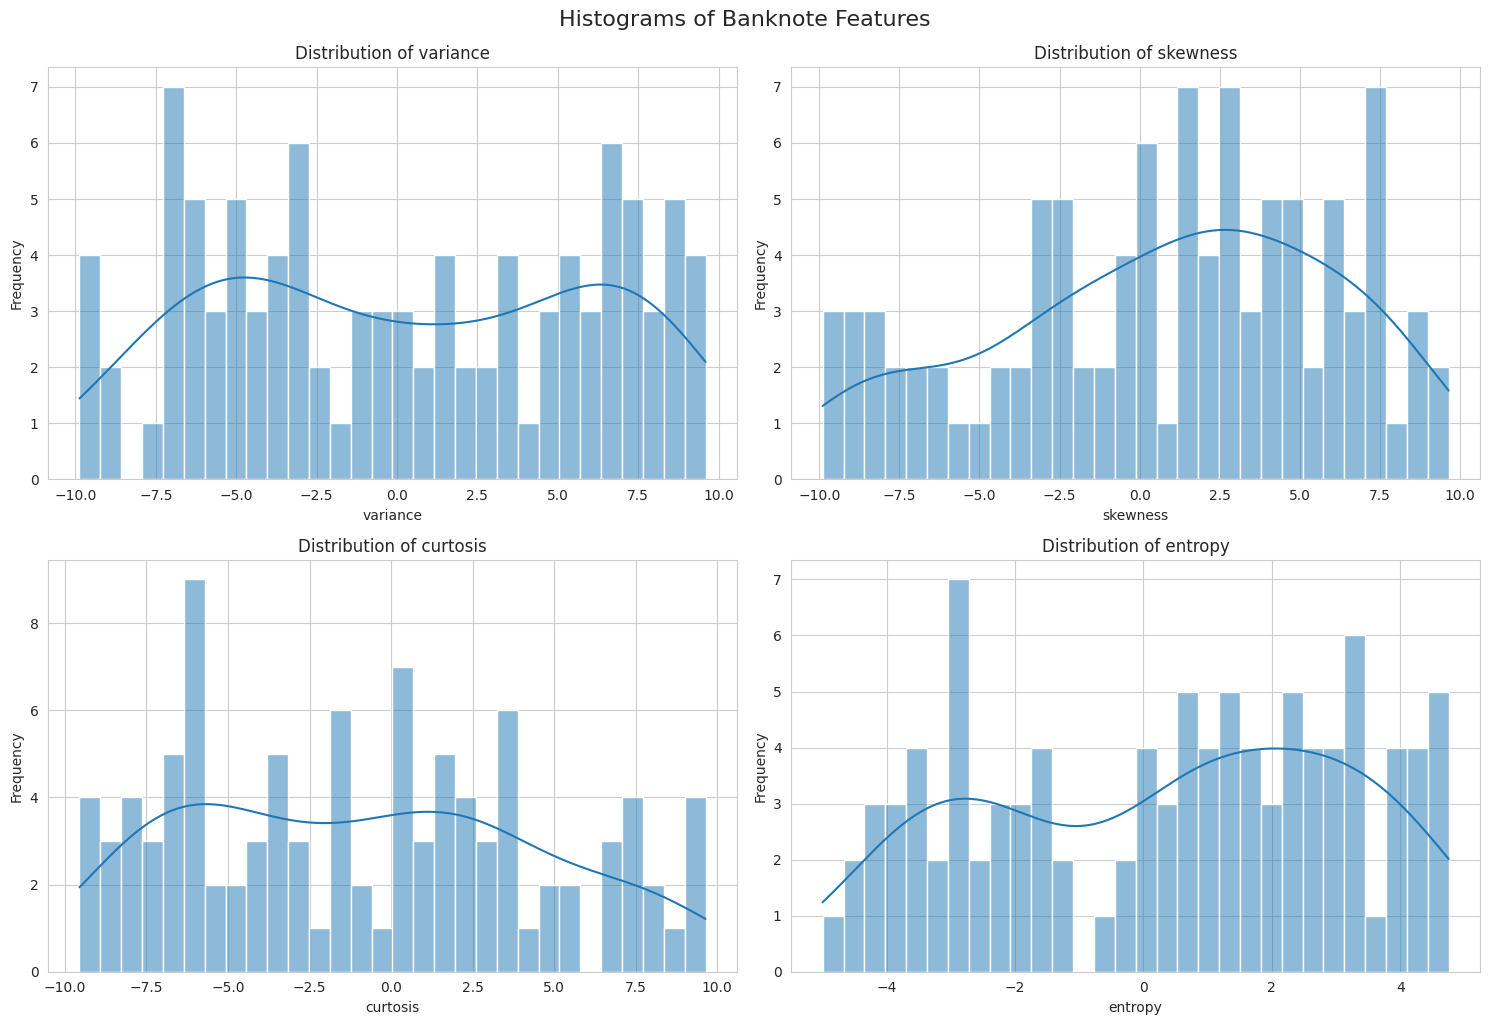


Generating Pair Plot (this might take a moment)...


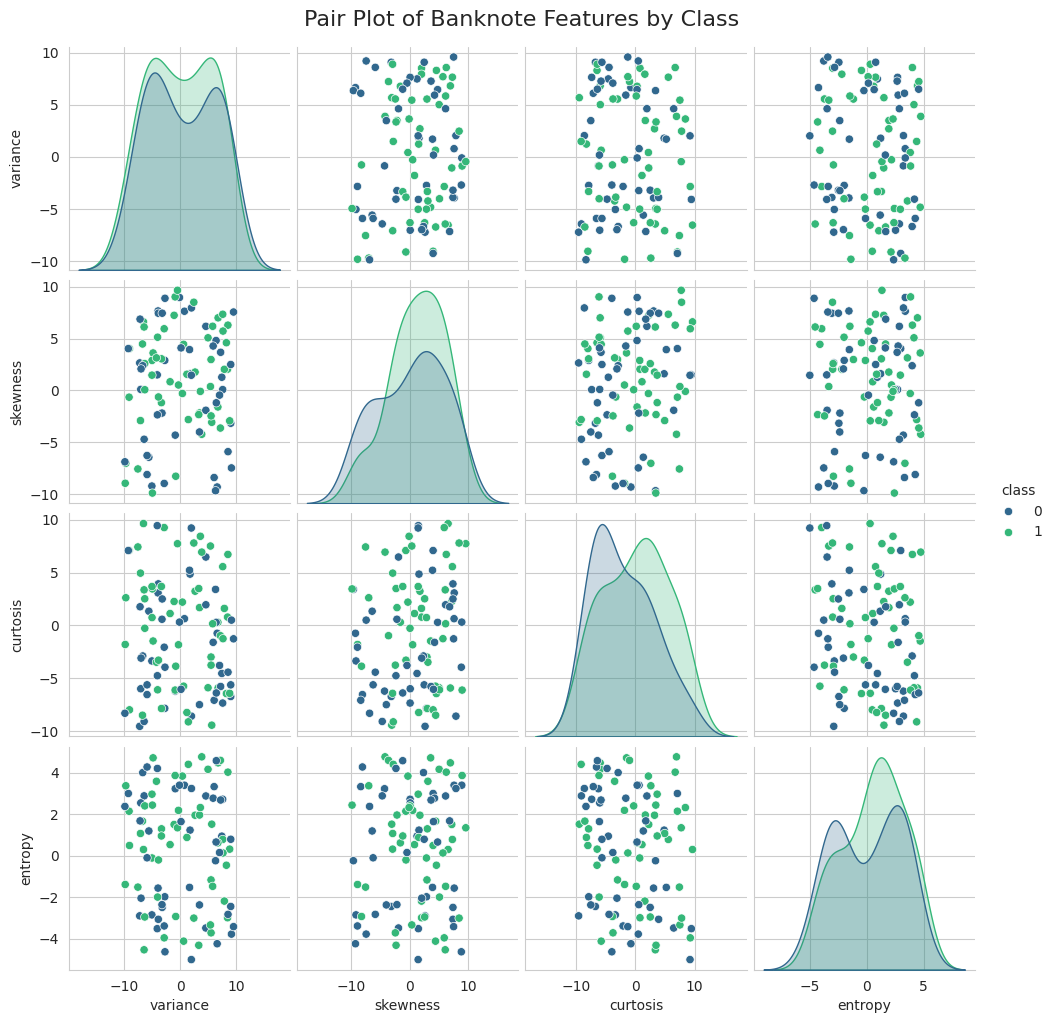

Pair Plot generated.


/tmp/ipython-input-2-100575217.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], x=df['class'], palette='coolwarm')
/tmp/ipython-input-2-100575217.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], x=df['class'], palette='coolwarm')
/tmp/ipython-input-2-100575217.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], x=df['class'], palette='coolwarm')
/tmp/ipython-input-2-100575217.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x`

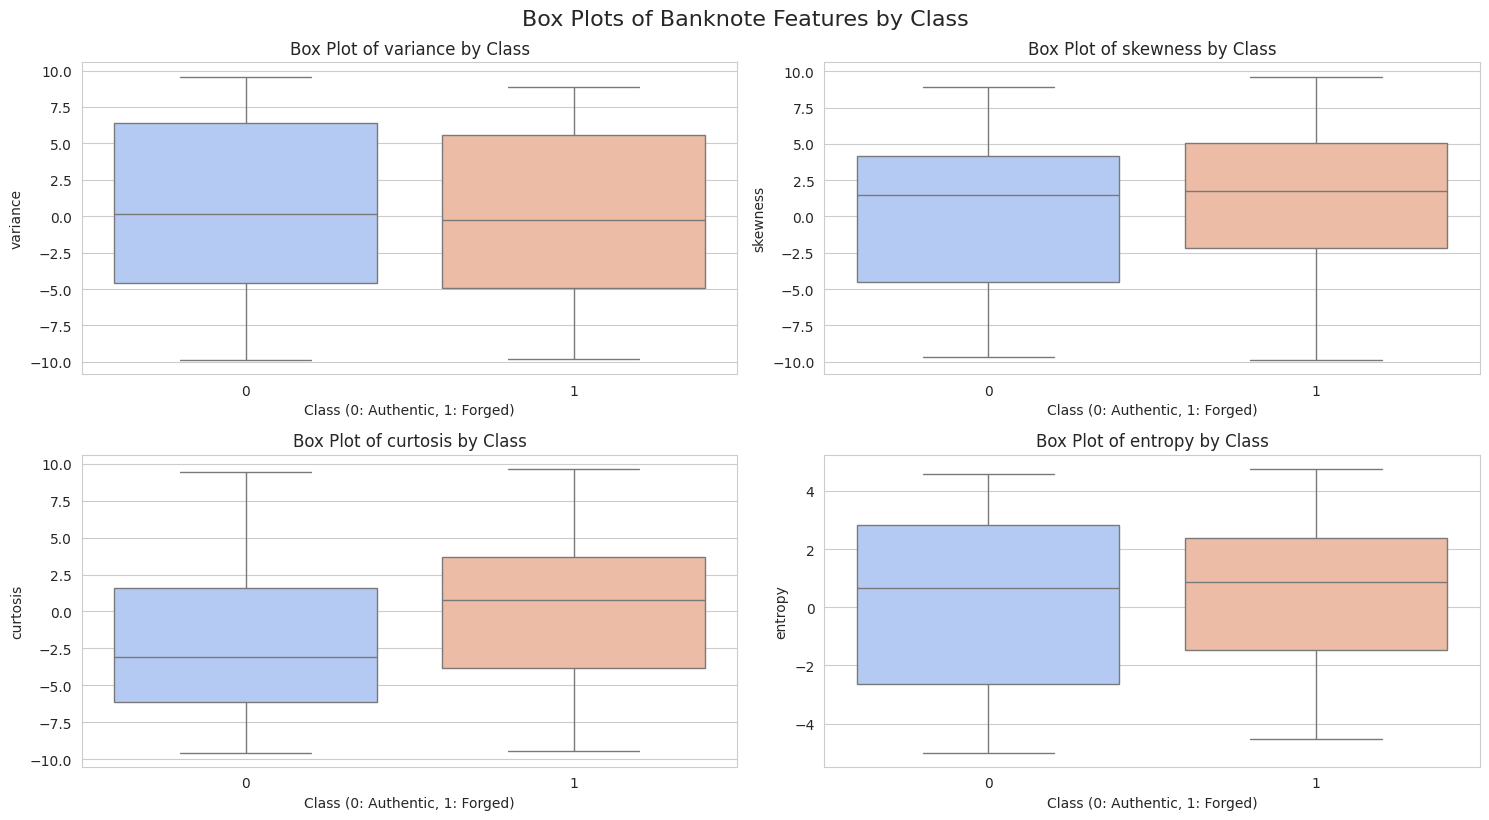

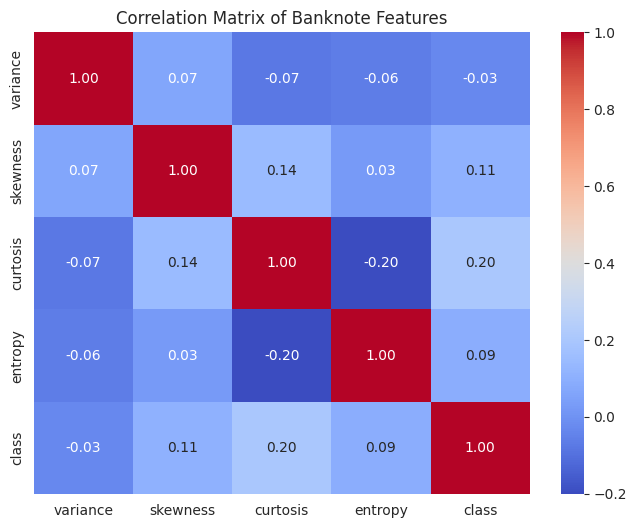

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Load the given Banknote authentication dataset.
# Assuming the dataset is in a CSV file named 'banknote_authentication.csv'
# If the file is not found, a dummy DataFrame will be created for demonstration purposes.
try:
    # Common column names for this dataset
    column_names = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
    df = pd.read_csv('banknote_authentication.csv', header=None, names=column_names)
    print("Banknote Authentication dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'banknote_authentication.csv' not found. Creating a dummy DataFrame for demonstration.")
    # Create a dummy DataFrame if the file is not found
    data = {
        'variance': np.random.uniform(-10, 10, 100),
        'skewness': np.random.uniform(-10, 10, 100),
        'curtosis': np.random.uniform(-10, 10, 100),
        'entropy': np.random.uniform(-5, 5, 100),
        'class': np.random.randint(0, 2, 100) # 0 for authentic, 1 for forged
    }
    df = pd.DataFrame(data)

print("\nDataset Head:")
print(df.head())

print("\nDataset Info:")
df.info()

# Step 2: Calculate statistical measures, e.g. mean and standard deviation.
print("\nStatistical Measures (df.describe()):")
print(df.describe())

# Step 3: Visualise your data as you consider fit.

# Set a style for the plots
sns.set_style("whitegrid")

# Create histograms for each feature to see their distribution
plt.figure(figsize=(15, 10))
for i, col in enumerate(column_names[:-1]): # Exclude the 'class' column for individual histograms
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.suptitle('Histograms of Banknote Features', y=1.02, fontsize=16)
plt.show()

# Create pair plots to visualize relationships between features, colored by class
# This is particularly useful for assessing separability, which is key for clustering
print("\nGenerating Pair Plot (this might take a moment)...")
# Using a subset of the data if it's very large for faster plotting, or plot all if size is manageable
# For Banknote Authentication (around 1372 samples), full pairplot is fine.
sns.pairplot(df, hue='class', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Banknote Features by Class', y=1.02, fontsize=16)
plt.show()
print("Pair Plot generated.")

# Box plots to visualize distribution and potential outliers for each feature
plt.figure(figsize=(15, 8))
for i, col in enumerate(column_names[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col], x=df['class'], palette='coolwarm')
    plt.title(f'Box Plot of {col} by Class')
    plt.xlabel('Class (0: Authentic, 1: Forged)')
    plt.ylabel(col)
plt.tight_layout()
plt.suptitle('Box Plots of Banknote Features by Class', y=1.02, fontsize=16)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Banknote Features')
plt.show()

Error: 'banknote_authentication.csv' not found. Creating a dummy DataFrame for demonstration.


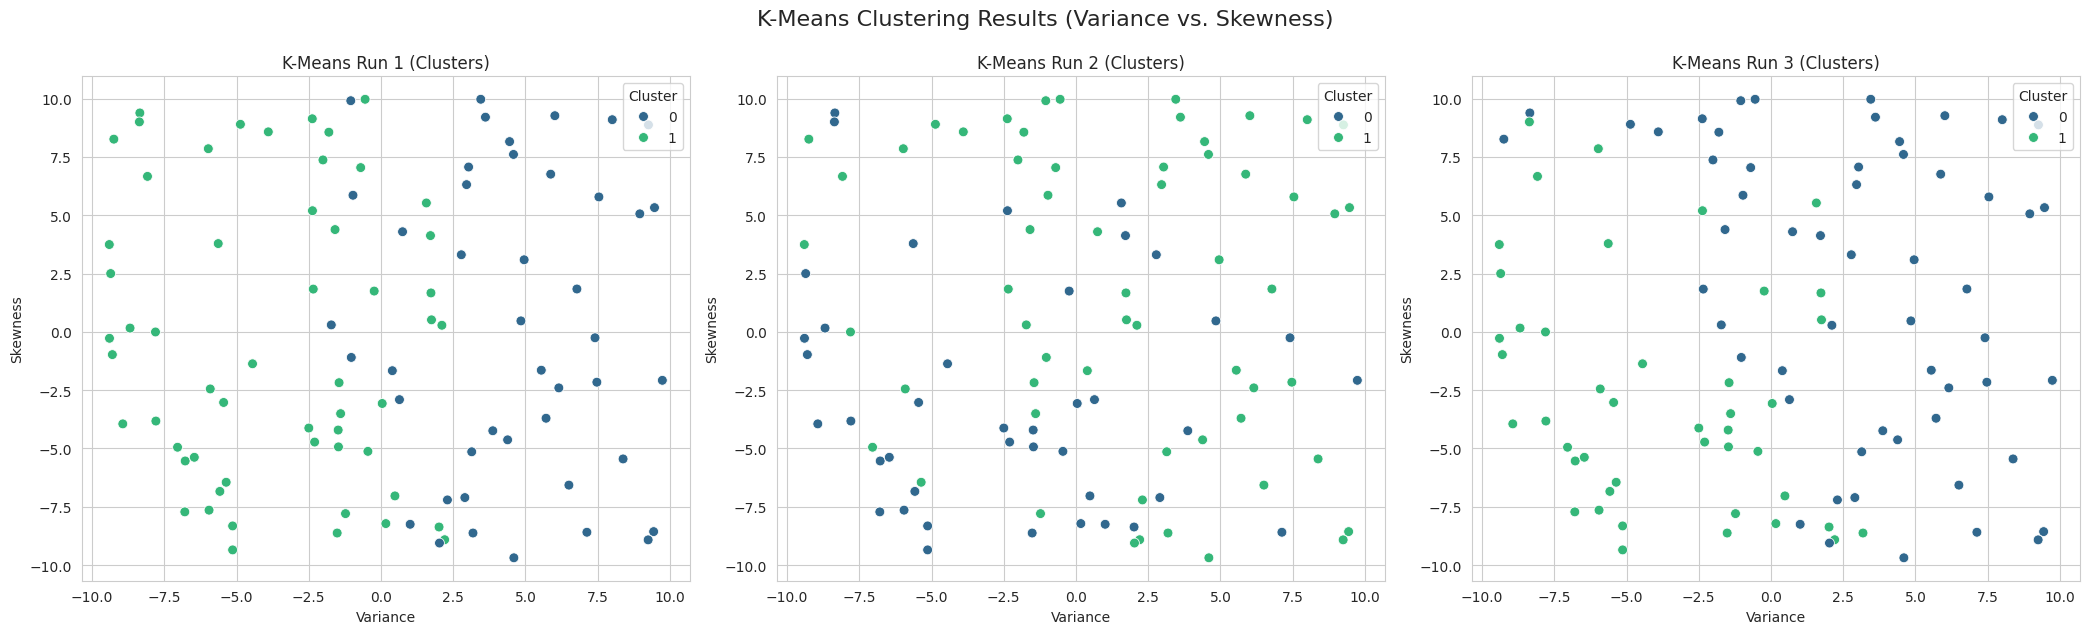

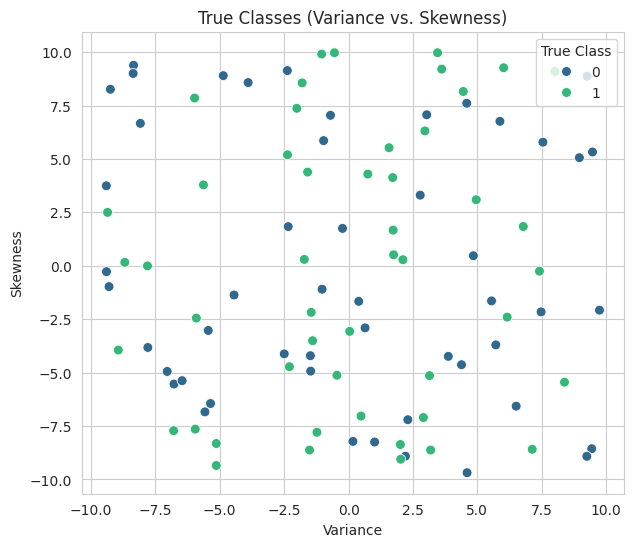

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Step 1: Load the given Banknote authentication dataset.
try:
    column_names = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
    df = pd.read_csv('banknote_authentication.csv', header=None, names=column_names)
    print("Banknote Authentication dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'banknote_authentication.csv' not found. Creating a dummy DataFrame for demonstration.")
    data = {
        'variance': np.random.uniform(-10, 10, 100),
        'skewness': np.random.uniform(-10, 10, 100),
        'curtosis': np.random.uniform(-10, 10, 100),
        'entropy': np.random.uniform(-5, 5, 100),
        'class': np.random.randint(0, 2, 100) # 0 for authentic, 1 for forged
    }
    df = pd.DataFrame(data)

# Separate features (X) from the true labels (y)
X = df.drop('class', axis=1)
y = df['class'] # We'll use this later to compare with K-Means results

# Preprocessing: Scale the features
# K-Means is distance-based, so scaling is crucial to prevent features with larger ranges
# from dominating the distance calculations.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Step 2 & 3: Run K-means several times and visualise the results.
# We expect 2 clusters (authentic/forged), so n_clusters=2.
# We set random_state for reproducibility for the first run, then remove it to show variability.

num_runs = 3 # Number of times to re-run K-Means
fig, axes = plt.subplots(1, num_runs, figsize=(num_runs * 7, 6)) # Create subplots for comparison

# Features to plot (choose two for a 2D scatter plot)
plot_feature_x = 'variance'
plot_feature_y = 'skewness'

# Get the original (unscaled) feature values for plotting
plot_data = df[[plot_feature_x, plot_feature_y]]


for i in range(num_runs):
    # For demonstration of stability, we'll run KMeans without a fixed random_state
    # for subsequent runs to show potential variations due to different initializations.
    # In practice, n_init > 1 is used to get the best result.
    kmeans = KMeans(n_clusters=2, random_state=None if i > 0 else 42, n_init=1, init='random') # n_init=1 to show single run variability
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_

    # Create a DataFrame for plotting, including original features and cluster labels
    plot_df = plot_data.copy()
    plot_df['cluster'] = cluster_labels
    # Add the 'class' column for comparison purposes
    plot_df['class'] = df['class']

    # Map cluster labels to match true classes if possible for better comparison in visualization
    # K-Means labels (0, 1) are arbitrary. We check which cluster aligns with 'class' 0.
    # This is an optional step for clearer visualization, not part of K-Means itself.
    cluster_0_count = plot_df[plot_df['cluster'] == 0]['class'].value_counts()
    if cluster_0_count.get(0, 0) > cluster_0_count.get(1, 0): # If cluster 0 mostly contains true class 0
        plot_df['visual_cluster'] = plot_df['cluster'] # Keep as is
    else: # If cluster 0 mostly contains true class 1, swap labels for visualization
        plot_df['visual_cluster'] = plot_df['cluster'].apply(lambda x: 1-x)


    ax = axes[i] if num_runs > 1 else axes # Handle single subplot case
    sns.scatterplot(x=plot_feature_x, y=plot_feature_y, hue='visual_cluster',
                    data=plot_df, palette='viridis', s=50, ax=ax)
    ax.set_title(f'K-Means Run {i+1} (Clusters)')
    ax.set_xlabel(plot_feature_x.capitalize())
    ax.set_ylabel(plot_feature_y.capitalize())
    ax.legend(title='Cluster', loc='upper right')

plt.tight_layout()
plt.suptitle('K-Means Clustering Results (Variance vs. Skewness)', y=1.05, fontsize=16)
plt.savefig('kmeans_runs_comparison.png')
plt.show()

# Step 4 & 5: Compare the results: is the K-means algorithm stable? Describe your results.
# To numerically compare stability, we can check how many points change clusters
# or if the cluster centers are similar (after accounting for label swapping).
# For this exercise, visual comparison across plots is key.

# Let's also show one plot with true labels for comparison
plt.figure(figsize=(7, 6))
sns.scatterplot(x=plot_feature_x, y=plot_feature_y, hue=y, data=df, palette='viridis', s=50)
plt.title('True Classes (Variance vs. Skewness)')
plt.xlabel(plot_feature_x.capitalize())
plt.ylabel(plot_feature_y.capitalize())
plt.legend(title='True Class', loc='upper right')
plt.savefig('true_classes_plot.png')
plt.show()

# My Final Data Science Project Notebook
```markdown
## Introduction

This notebook is a part of my final assignment for the Data Science Tools and Ecosystem course. It demonstrates various data science concepts, including popular languages, libraries, tools, and basic arithmetic operations, presented within a JupyterLite Notebook environment.
```markdown
## Data Science Languages

Some of the most popular languages used in Data Science include:

* Python
* R
* SQL
* Julia
* Scala
* Java
* MATLAB
```markdown
## Data Science Libraries

Key libraries commonly used in Data Science include:

* **Python Libraries:**
    * Pandas (for data manipulation and analysis)
    * NumPy (for numerical computing)
    * Matplotlib (for data visualization)
    * Seaborn (for statistical data visualization)
    * Scikit-learn (for machine learning)
    * TensorFlow (for deep learning)
    * Keras (for deep learning)
    * PyTorch (for deep learning)
* **R Libraries:**
    * dplyr (for data manipulation)
    * ggplot2 (for data visualization)
    * caret (for machine learning)
```markdown
## Data Science Tools

| Category          | Tool Name         | Description                                     |
| :---------------- | :---------------- | :---------------------------------------------- |
| **Development Environments** | Jupyter Notebook  | Interactive computing environment               |
|                   | JupyterLab        | Next-generation web-based user interface for Jupyter |
|                   | RStudio           | Integrated development environment for R        |
|                   | VS Code           | Popular code editor with data science extensions |
| **Data Management** | MySQL             | Relational database management system           |
|                   | PostgreSQL        | Object-relational database system               |
|                   | MongoDB           | NoSQL document database                         |
| **Big Data Tools**| Apache Spark      | Unified analytics engine for big data processing |
|                   | Apache Hadoop     | Framework for distributed storage and processing |
| **Cloud Platforms**| IBM Cloud         | Cloud computing services                        |
|                   | AWS               | Amazon Web Services                             |
|                   | Google Cloud Platform | Google's suite of cloud computing services      |
| **Version Control**| Git               | Distributed version control system              |
|                   | GitHub            | Web-based platform for version control and collaboration |
```markdown
## Arithmetic Expression Examples

In this section, we will explore some basic arithmetic operations using Python code.
```markdown
## Objectives

The key objectives of this notebook are to:

* Summarize popular data science languages.
* List commonly used data science libraries.
* Present a table of essential data science tools.
* Demonstrate basic arithmetic operations in Python.
* Convert units using Python code.
* Showcase the use of Markdown cells for structured content.
```markdown
## Author

[Md Tanvir Islam]

In [6]:
# This is a simple arithmetic expression to multiply then add integers.
result = (3 * 4) + 5
print(result)


17


In [ ]:
# This code cell will convert 200 minutes into hours by dividing by 60.
minutes = 200
hours = minutes / 60
print(f"{minutes} minutes is equal to {hours:.2f} hours")
